In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering

# Pre process Data

In [2]:
# Load the dataset
df = pd.read_csv('/Users/deeptilalwani/Documents/Data Science/ASSIGNMENTS/8/wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [4]:
# Convert data to a numpy array
df_np = df.to_numpy()


In [5]:
# Normalizing the  numerical data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# PCA implementation


In [8]:
# Perform PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(df_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

In [9]:
# PCA Components matrix or covariance matrix
pca_components_matrix = pca.components_
pca_components_matrix

array([[ 0.39366953, -0.13632501,  0.22267638, -0.00225793,  0.22429849,
        -0.12463016, -0.35926404, -0.39071171,  0.2670012 , -0.2790625 ,
         0.08931829, -0.27682265, -0.35052618, -0.26951525],
       [-0.00569041, -0.48416087, -0.22359095, -0.31585588,  0.01161574,
        -0.30055143, -0.06711983,  0.00131345, -0.0269887 , -0.04122256,
        -0.52978274,  0.27790735,  0.16277625, -0.36605886],
       [ 0.00121795, -0.20740081,  0.08879606,  0.62610236,  0.6119896 ,
         0.13098458,  0.14650775,  0.15096275,  0.16997551,  0.14987959,
        -0.1372663 ,  0.08532854,  0.16620436, -0.12668685]])

In [10]:
# The amount of variance that each PCA has
explained_variance = pca.explained_variance_
explained_variance

array([5.56722458, 2.51118402, 1.45424413])

In [11]:
# Cumulative variance of each PCA
cumulative_variance = np.cumsum(explained_variance)
cumulative_variance

array([5.56722458, 8.0784086 , 9.53265274])

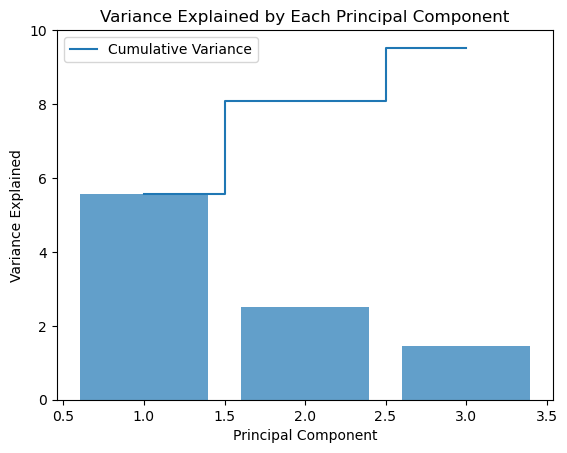

In [12]:
# Plot variance explained by each PCA
plt.bar(range(1, 4), explained_variance, alpha=0.7, align='center')
plt.step(range(1, 4), cumulative_variance, where='mid', label='Cumulative Variance')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by Each Principal Component')
plt.legend(loc='best')
plt.show()

##### The height of each bar indicates the amount of variance captured by the corresponding principal component.
##### The cumulative variance plot (step plot) shows the total variance explained as we move from the first principal component to the third one. 

In [13]:
# Create a final dataframe with the principal components
final_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
final_df

,PC1,PC2,PC3
0,-3.522934,-1.453098,-0.164795
1,-2.528858,0.330019,-2.026707
2,-2.785029,-1.036936,0.983238
3,-3.922588,-2.768210,-0.174968
4,-1.407511,-0.867773,2.025829
...,...,...,...
173,3.627996,-2.206617,-0.343668
174,2.942729,-1.752263,0.207480
175,3.027272,-2.756040,-0.940803
176,2.755222,-2.293784,-0.550474


##### PCA is applied to reduce the original high-dimensional data into a lower-dimensional representation.
##### In this case, I reduced the data to 3 principal components. 

/var/folders/c1/y9rtpw857h729s9ssm0kwlmw0000gn/T/ipykernel_9604/55550461.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(final_df['PC1'], final_df['PC2'], cmap='viridis', edgecolor='k')


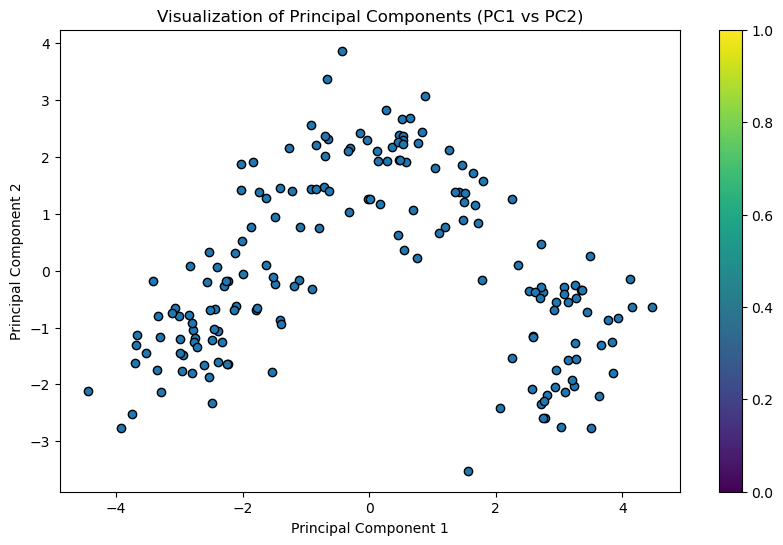

In [14]:
# Visualization of PCAs (scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(final_df['PC1'], final_df['PC2'], cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualization of Principal Components (PC1 vs PC2)')
plt.colorbar()
plt.show()

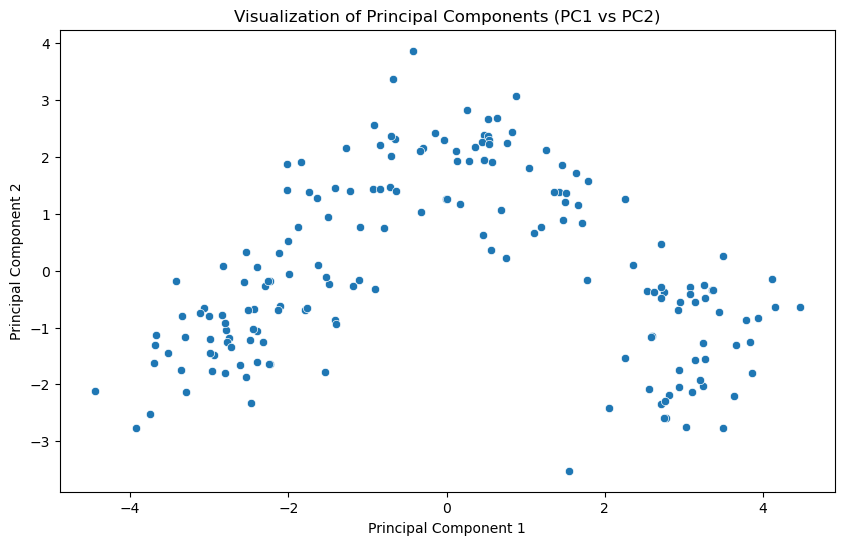

In [15]:
# Visualization of PCAs (scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_df, x='PC1', y='PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualization of Principal Components (PC1 vs PC2)')
plt.show()

##### The colors in the scatter plot are not based on true clusters but indicate the density of data points in different regions.

/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

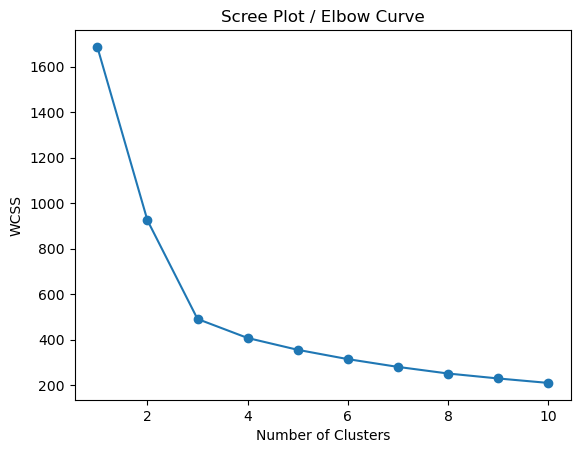

In [16]:
#Visualize the scree plot or elbow curve to determine the optimal number of clusters using K-means
# Calculate the within-cluster sum of squares (WCSS) for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(principal_df)
    wcss.append(kmeans.inertia_)

# Plot the scree plot or elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Scree Plot / Elbow Curve')
plt.show()

In [17]:
#decrease in WCSS starts to level off at 3 ,hence optinam number of clusters =3
optimal_clusters = 3

# Hierarchical clustering

In [18]:
hierarchical_clustering = AgglomerativeClustering(n_clusters=optimal_clusters)
hierarchical_clusters = hierarchical_clustering.fit_predict(principal_df)


In [19]:
# Add the cluster labels to the DataFrame
df['hierarchical_cluster'] = hierarchical_clusters

# Analyze the number of clusters formed
num_clusters = len(np.unique(hierarchical_clusters))
print("Number of clusters formed:", num_clusters)

Number of clusters formed: 3


# K-mean clustering

In [20]:
# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_clusters = kmeans.fit_predict(principal_df)

/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
# Add the cluster labels to theDataFrame
df['kmeans_cluster'] = kmeans_clusters

# Analyze the number of clusters formed
numk_clusters = len(set(kmeans_clusters))
print("Number of clusters formed:", numk_clusters)

Number of clusters formed: 3


# Compare the predicted clusters with the original class column

In [22]:
# Compare the clusters with the original class column
original_clusters = 3 #(given in problem statement)

print("Hierarchical Clustering:")
print("Original Clusters:", original_clusters)
print("Predicted Clusters:", hierarchical_clusters)

print("\nK-means Clustering:")
print("Original Clusters:", original_clusters)
print("Predicted Clusters:", kmeans_clusters)

Hierarchical Clustering:
Original Clusters: 3
Predicted Clusters: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

K-means Clustering:
Original Clusters: 3
Predicted Clusters: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


##### These cluster assignments indicate which group each data point belongs to, based on the similarity of their features.

In [23]:
print("Hierarchical Clustering:")
print("Original Clusters:", original_clusters)
print("Predicted Clusters:", num_clusters)

print("\nK-means Clustering:")
print("Original Clusters:", original_clusters)
print("Predicted Clusters:", numk_clusters)

Hierarchical Clustering:
Original Clusters: 3
Predicted Clusters: 3

K-means Clustering:
Original Clusters: 3
Predicted Clusters: 3


##### Having the same number of clusters suggests that the clustering algorithms were able to successfully identify and group the data points into similar clusters.

##### This alignment between the original and predicted clusters indicates that the clustering algorithms performed well in this particular case.

# Visualizations 

##### using scatter plots to represent the data points in the reduced 3-dimensional space obtained from PCA

In [24]:
# Create scatter plots for hierarchical clustering and K-means clustering
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

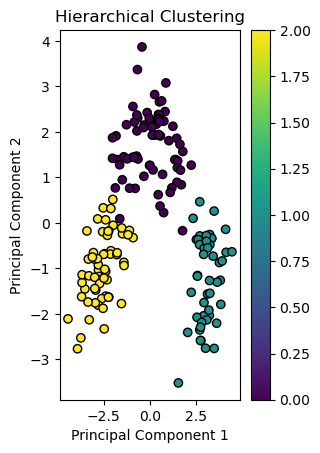

In [25]:
# Hierarchical Clustering
plt.subplot(1, 2, 1)
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=hierarchical_clusters, cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Hierarchical Clustering')
plt.colorbar()

##### i have colored the data points based on their predicted cluster labels for both hierarchical clustering and K-means clustering.

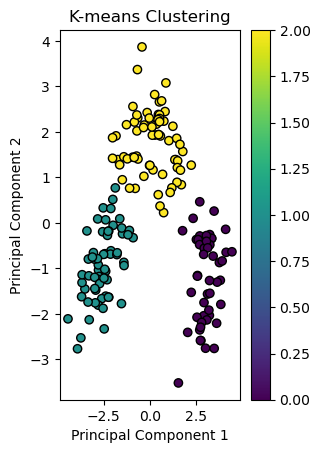

In [26]:
# K-means Clustering
plt.subplot(1, 2, 2)
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=kmeans_clusters, cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering')
plt.colorbar()

##### We can see distinct and well-separated clusters in the scatter plot, indicating that the clustering algorithms have successfully identified different groups in the data.

# Evaluating the clustering performance quantitatively 

### Silhouette Score

In [27]:
from sklearn.metrics import silhouette_score

In [28]:
# Calculate silhouette score for hierarchical clustering
hierarchical_silhouette_score = silhouette_score(principal_df, hierarchical_clusters)


In [29]:
# Calculate silhouette score for K-means clustering
kmeans_silhouette_score = silhouette_score(principal_df, kmeans_clusters)

In [30]:
print("Silhouette Score for Hierarchical Clustering:", hierarchical_silhouette_score)
print("Silhouette Score for K-means Clustering:", kmeans_silhouette_score)

Silhouette Score for Hierarchical Clustering: 0.47882407301804486
Silhouette Score for K-means Clustering: 0.48817506649357856


##### The silhouette score for hierarchical clustering is approximately 0.4788.
##### The silhouette score for K-means clustering is approximately 0.4882.
##### The positive silhouette score suggests that the K-means clustering has produced relatively well-separated clusters.
### Overall, the silhouette scores indicate that both clustering methods have achieved some level of cluster separation
